# Implementing linear regression using TensorFlow

## 1. Generate synthetic data

Suppose there are some values, y_data, (for example, life satisfaction values for 
a number of countries), I want to explain the data using some feature vectors x_data (e.g., GDP per capita, life expectancy, air quality). To do so, I assume a linear model, y_data = x_data\*weights + bias. I would like to use machine learning to learn a model that can explain life satisfaction using the  features, e.g., GDP per capita. Speficially, I would like a machine learning algorithm to figure out the optimal values for weights and bias.



In [1]:
import numpy as np

In [2]:
x_data = np.random.randn(2000,1)  # sythentic GDP data, standardized by removing the mean
w_real = np.array([0.3])

# For a multiple variable regression
#x_data = np.random.randn(2000,3)
#w_real = np.array([[0.3],[0.5],[0.1]])

In [3]:
print(w_real.shape)
print(x_data.shape)

(1,)
(2000, 1)


In [4]:
b_real = -0.2

In [5]:
noise = np.random.randn(2000,1)*0.1

In [6]:
y_data = x_data * w_real + b_real + noise

In [7]:
y_data.shape

(2000, 1)

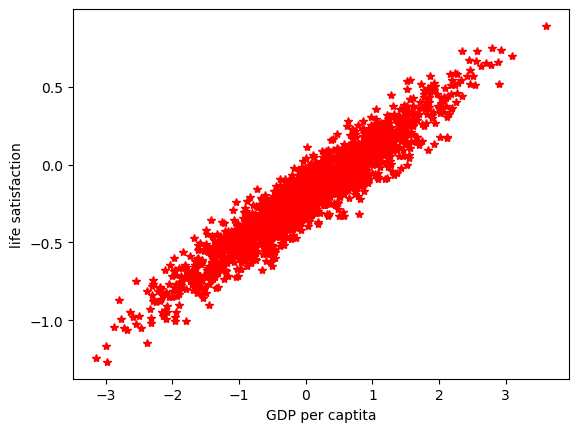

In [8]:
import matplotlib.pyplot as plt
plt.plot(x_data,y_data,'r*')
plt.xlabel("GDP per captita")
plt.ylabel("life satisfaction")
#plt.axis([-5, 5, -3, 3])
plt.show()

## 2. Train a linear regression model in TensorFlow

In [24]:
import tensorflow as tf

# Supress tensorflow warnings as I am only running CPU
TF_CPP_MIN_LOG_LEVEL="2"

In [25]:
cost_val = []

In [26]:
w = tf.Variable([0.2],tf.float32, name='weights')
b = tf.Variable([2.4],tf.float32, name='bias')

In [27]:
learning_rate = 0.01
training_epochs = 1000

In [28]:
for epoch in range(training_epochs):
  with tf.GradientTape(persistent=True) as tape:
    y_predicted = x_data*w  + b
    loss = tf.reduce_mean(tf.square(y_data-y_predicted))

  dloss_dw = tape.gradient(loss,w)
  dloss_db = tape.gradient(loss,b)

  w.assign_sub(learning_rate*dloss_dw)                     
  b.assign_sub(learning_rate*dloss_db)    

  cost_val.append(loss)

Now, we need to define optimizer.

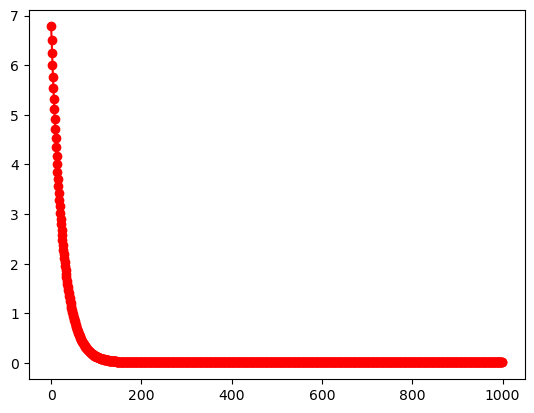

In [29]:
import matplotlib.pyplot as plt
plt.plot(np.arange(training_epochs),cost_val,'-ro')
plt.show()

In [30]:
print(w)

<tf.Variable 'weights:0' shape=(1,) dtype=float32, numpy=array([0.29787412], dtype=float32)>


In [31]:
print(b)

<tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([-0.20098889], dtype=float32)>


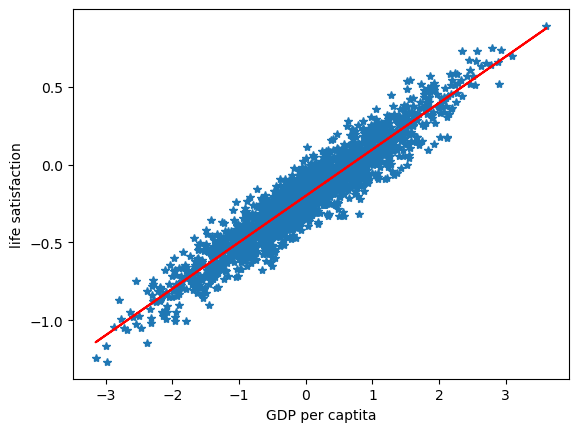

In [32]:
plt.plot(x_data,y_data,'*')
plt.xlabel("GDP per captita")
plt.ylabel("life satisfaction")
plt.plot(x_data,y_predicted,'r')
plt.show()